# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Brightspace no later than **March 10th kl. 23:59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

<font color='red'>**!!! IMPORTANT: YOU ARE NOT ALLOWED TO USE LIBRARY FUNCTIONS (SCIPY, NUMPY etc.) UNLESS EXPLICITY MENTIONED !!!**
</font>

Good luck!

In [2]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [3]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import seaborn as sns

RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

wq = pd.read_csv("./data/winequality-red.csv", sep=';')
toy = wq[wq['quality'].isin([4, 8])].sample(n=20, random_state=RANDOM_SEED)

# Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (0, 0) and (1,1)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


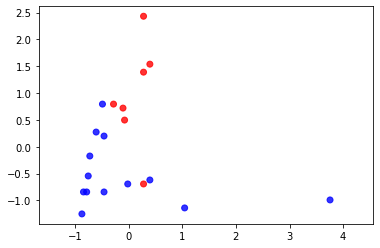

In [17]:
color_map = {4:'Blue', 8:'Red'}
X_kmeans = toy[["sulphates", "alcohol"]]

scaler = StandardScaler().fit(X_kmeans)
X_scaled = scaler.transform(X_kmeans)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=toy['quality'].map(color_map))
plt.axis('equal');

*******************
**Answer**

We have that, when assigning points to a cluster, it is assigned as follows:

$C_i =  \{x \in X : \argmin_{i} ||x - \mu_i||^2\}$

meaning that, for each point $x \in X$, we compute the distance to each centroid $\mu_i$ and assign it to the cluster with the closest centroid. Thus forming the clusters $C_i$, for i assigning all the different clusters.

So, for the point in the lower left corner, we have that its coordinates are $p \approx (-0.869, -1.252)$. We compute the distance to each centroid, and we have that: 

$||p - \mu_1||^2 = \sqrt{(-0.869-0)^2 + (-1.252-0)^2}^2 = (-0.869)^2 + (-1.252)^2 = 2.323$

$||p - \mu_2||^2 = \sqrt{(-0.869-1)^2 + (-1.252-1)^2}^2 = (-1.869)^2 + (-2.252)^2 = 8.565$

So, we assign the point to the cluster with the closest centroid, which is the cluster with centroid $\mu_1 = (0,0)$, and we have that $C_1 = \{p\}$.

Then we go through all the other points, to assign them to a cluster. We have that:

$C_1 = [(-0.751, -0.545), (-0.456, 0.199), (-0.015, -0.694), (-0.456, -0.843),$\
$(-0.839, -0.843), (-0.604, 0.273), (-0.103, 0.720), (0.280, -0.694), (-0.721, -0.173),$\
$(0.397, -0.619), (-0.780, -0.843), (-0.486, 0.794), (-0.074, 0.497), (-0.280, 0.794),$\
$(1.045, -1.140), (-0.869, -1.252)]$\
$C_2 = [(0.280, 1.389), (0.280, 2.431), (3.754, -0.991), (0.397, 1.538)]$

******************

In [15]:
# Setting the initial centroids
mu1, mu2 = [0, 0], [1, 1]

def clustering_k2(X, mu1, mu2):

    # Initializing the clusters
    C1, C2 = [], []

    # Set an empty list to store the labels
    labels = []

    # Loop over all the points in X_scaled using the method described above to assing each point to a cluster
    for p in X:
        # Distance from each centroid
        d1 = (p[0] - mu1[0])**2 + (p[1] - mu1[1])**2
        d2 = (p[0] - mu2[0])**2 + (p[1] - mu2[1])**2

        # Assigning the point to the closest centroid
        if d1 < d2:
            C1.append(p)
            labels.append(0)
        else:
            C2.append(p)
            labels.append(1)
        
        
    print(f'The points falling in cluster C_1 are:\n {C1}\n')
    print(f'The points falling in cluster C_2 are:\n {C2}\n')
    print(f'We get the following labels:\n {labels}\n in the same order as the points in X_scaled')

clustering_k2(X_scaled, mu1, mu2)

The points falling in cluster C_1 are:
 [array([-0.75082858, -0.54497977]), array([-0.456386  ,  0.19901992]), array([-0.01472213, -0.69377971]), array([-0.456386  , -0.84257965]), array([-0.83916135, -0.84257965]), array([-0.60360729,  0.27341989]), array([-0.1030549,  0.7198197]), array([ 0.27972045, -0.69377971]), array([-0.72138432, -0.17297993]), array([ 0.39749748, -0.61937974]), array([-0.78027283, -0.84257965]), array([-0.48583026,  0.79421967]), array([-0.07361064,  0.49661979]), array([-0.27972045,  0.79421967]), array([ 1.04527116, -1.14017952]), array([-0.86860561, -1.25177947])]

The points falling in cluster C_2 are:
 [array([0.27972045, 1.38941942]), array([0.27972045, 2.43101898]), array([ 3.75414288, -0.99137958]), array([0.39749748, 1.53821935])]

We get the following labels:
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
 in the same order as the points in X_scaled


In order to evaluate the correctness of the results, we can use the sklearn.cluster.KMeans function. Which gives us the following results:


In [14]:
# Assining the initial centroids to be used in the KMeans function below
start_centroids = np.array([[0,0], [1,1]])

# Setting up the KMeans function
Centroids = KMeans(n_clusters=2, init=start_centroids, n_init=1, random_state=RANDOM_SEED)

# Fitting the KMeans function to the data
Centroids.fit(X_scaled)

# Retrieving the labels from the KMeans function
print(f'Thus we get that the labels are:\n {Centroids.labels_}\n in the same order as the points in X_scaled') 

Thus we get that the labels are:
 [0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 in the same order as the points in X_scaled


Thus validating our clustering results.

### Task 1.1.2 (2 point)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Show two examples with two different initial cluster assignments that lead to a different result. <br>

*******************
**Answer**

Two examples with two different initial cluster assignments that lead to a different result are:

initial_cluster_1 = np.array([[0, 0], [1, 1]])\
initial_cluster_2 = np.array([[0, 0], [4, -1]])

To see this, we can run the same function as above, but with the second initial cluster assignment, as we have already seen the results for the first one. Thus we get that:

In [16]:
mu1, mu2 = [0,0], [4, -1]

clustering_k2(X_scaled, mu1, mu2)

The points falling in cluster C_1 are:
 [array([-0.75082858, -0.54497977]), array([-0.456386  ,  0.19901992]), array([-0.01472213, -0.69377971]), array([-0.456386  , -0.84257965]), array([0.27972045, 1.38941942]), array([-0.83916135, -0.84257965]), array([0.27972045, 2.43101898]), array([-0.60360729,  0.27341989]), array([-0.1030549,  0.7198197]), array([ 0.27972045, -0.69377971]), array([-0.72138432, -0.17297993]), array([ 0.39749748, -0.61937974]), array([-0.78027283, -0.84257965]), array([-0.48583026,  0.79421967]), array([-0.07361064,  0.49661979]), array([-0.27972045,  0.79421967]), array([0.39749748, 1.53821935]), array([ 1.04527116, -1.14017952]), array([-0.86860561, -1.25177947])]

The points falling in cluster C_2 are:
 [array([ 3.75414288, -0.99137958])]

We get the following labels:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 in the same order as the points in X_scaled


Showing that, with the second initial centroid assignment, we only get one point into the second cluster, and the rest of the points are assigned to the first cluster. Thus resulting in a different clustering then the first initilization of the centroids.
******************

<span style='color: green'>**\[Motivate\]**</span> <br>
B) How you explain the difference between the two cluster assignments in point A)?

*******************
**Answer**

This difference, is caused by the fact, that our second initialization of the centroids, had the second cluster right next to the one outlier in the dataset. This resulted in all the other point except for the outlier to be assigned to the first cluster. Thus resulting in a different clustering then the first initilization of the centroids.


******************

### Task 1.1.3 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **average-link**.

*******************
**Answer**

Jeg tror at vi skal genskabe plottet nedenfor...

******************

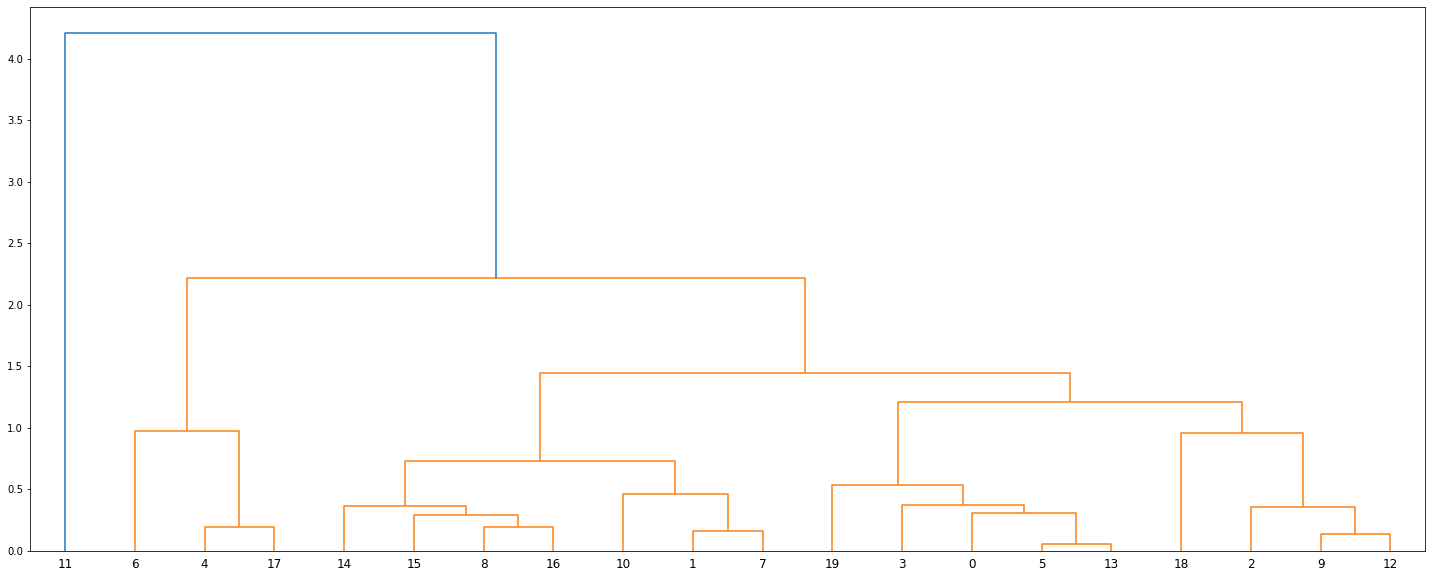

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X_scaled, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

### Task 1.1.4 (2 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering for the dataset of Task 1.1.1 using $\epsilon=0.35$ and $MinPts=3$. Present at least 2 iterations of the algorithm.<br> 
<font color='red'>**IMPORTANT: For this exercise you can use the DBSCAN from sklearn ONLY TO CHECK YOUR RESULTS**</font>

*******************
**YOUR ANSWER HERE**
Let's start by randomly selecting a point from the dataset. We'll choose the first point: [-0.75082858, -0.54497977], which we call point 0

We now calculate the distances between this point and all other points in the dataset using the Euclidean distance formula:

d = sqrt((x2 - x1)^2 + (y2 - y1)^2)


d_0 = sqrt((-0.75082858 - (-0.75082858))^2 + (-0.54497977 -(-0.54497977)^2) = 0
d_1 = sqrt((-0.75082858 -(-0.456386))^2 + (-0.54497977 - 0.19901992)^2) = 0.8001449666737707

d2-d10 = [0.7509954222039864, 0.4186431870723032, 2.191787287971323, 0.3104325442991004, 3.1493808695420027, 0.831535991863758, 1.421030763176982, 1.0412361494023215, 0.373163299558396, 4.527034422554428, 1.1507337193253573, 0.29905292167887026, 1.3651663797841393, 1.2423983969364318, 1.419647139702712, 2.378733136316918, 1.892151419342693, 0.7165453577794116]


We now check if there are at least min_pts (3) points within the epsilon radius of 0.35 of the first point. We have that:
[-0.83916135 -0.84257965], [-0.78027283 -0.84257965] is within epsilon radius of 0.35 of the first point, so we assign them to the same cluster as the point chosen and classify [-0.75082858, -0.54497977] as a core point.


We now move on to the next point in our dataset and repeat the process for each of the unvisited points in the dataset until all points have been assigned to clusters or marked as noise.

For the second point: point 1: [-0.456386, 0.19901992] we have the distances to all other points:
d_0 = sqrt((-0.75082858 - (-0.456386))^2 + (-0.54497977 - 0.19901992)^2) = 0.8001449666737707
d_1 = sqrt((-0.456386 -(-0.456386))^2 + (0.19901992 - 0.19901992)^2) = 0

d2-d10 = [0.9960713547514121, 1.0415995627365955, 1.3996083998766535, 1.1097056456194665, 2.350249459105429, 0.16495291286596545, 0.6293451159653702, 1.1571274232008908, 0.4567362412714291, 4.375569041881148, 1.1827489143896828, 1.090794358413927, 0.5959276020502993, 0.4848532318824955, 0.6208650885982008, 1.5882607251489445, 2.01207090879681, 1.5082254076828203]

here only point 7: [-0.60360729,  0.27341989] is within epsilon radius, which is less than min_pts in a cluster, so we assign point 1 [-0.456386, 0.19901992] as NOISE

NOISE = [point 1: [-0.456386, 0.19901992]]

We keep repeating for the remaining points in the dataset and we get
Core_points = points[0,5,9,13,16]

The remaining points are classified as NOISE:

NOISE = ponts[1,2,3,4,6,7,10,11,14,17,18,19]


We now collect all objects density-reachable from a core point 
and assign them to a new cluster.
eg.  for point 0 we can create a cluster

Cluster 0: [point 0: [-0.75082858 -0.54497977], point 5: [-0.83916135 -0.84257965], point 13: [-0.78027283 -0.84257965]]

furthermore since point 3: [-0.456386   -0.84257965] is density reachable from the core point point 13, we add it to the cluster

We keep repeating and finally have

Cluster 0: [point 0: [-0.75082858 -0.54497977], point 3: [-0.456386   -0.84257965], point 5: [-0.83916135 -0.84257965], point 13: [-0.78027283 -0.84257965]]

Cluster 1: [point 8: [-0.1030549   0.7198197 ], point 14: [-0.48583026  0.79421967], point 15: [-0.07361064  0.49661979], point 16: [-0.27972045  0.79421967]]

Cluster 2: [point 2: [-0.01472213 -0.69377971], point 9: [ 0.27972045 -0.69377971],  point 12: [ 0.39749748 -0.61937974]]

The remaining 9 points are classified as NOISE:

NOISE = ponts[1,4,6,7,10,11,17,18,19]
******************

In [ ]:
distances = []
neighbors =[]


point = X_scaled[0]
for p in range(len(X_scaled)):
        # Distance from each centroid
        d = np.linalg.norm(point - X_scaled[p])
        distances.append(d)
        if d <= 0.35:
                neighbors.append(f" point: {[X_scaled[p],p]} with distance {d}")
for i in neighbors:
        print(i)



NameError: name 'X_scaled' is not defined


B) <span style='color: green'>**\[Describe\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1?

*******************
**YOUR ANSWER HERE**
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Describe\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [ ] Angle based approach
- [ ] Depth based approach

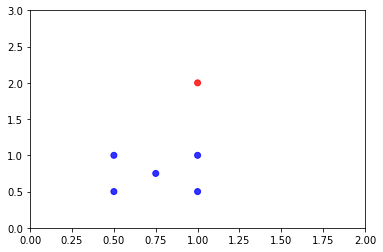

In [10]:
D_new = np.array([[1.0, 2.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0,3])
plt.show()

*******************
**YOUR ANSWER HERE**
The beset approach given the dataset is the depth-based approach. The depth of a point is defined as the number of half-spaces that contain the point. The deeper a point is, the less likely it is to be an outlier. Therefore, in this case, by computing the depth of each point, we can detect the red outlier point as the point with the smallest depth.


The other two approaches, distance-based and angle-based, may not be as effective in detecting the red outlier point in this particular dataset.

Distance-based approach:

With the given dataset, a distance-based approach can be used to identify the point farthest from the cluster in the dataset

Angle-based approach:

The angle-based approach involves computing the angle between the reference point and each other point in the dataset. The red outlier point may not be identified as an outlier in this approach because it is located close to other points that have similar angles. Additionally, selecting an appropriate reference point can be challenging and may require prior knowledge about the dataset.

Therefore, in this case, the depth-based approach is more appropriate since it considers the spatial distribution of the data and the relative position of each point with respect to the others, without depending on specific parameter values or reference points.
******************

## Task 1.3 Theoretical questions (4 points)
<span style='color: green'>**\[Prove\]**</span> 

1. You are given a measure $d(x,y) = |x-y|$, prove that the measure is a metric 
2. Prove that $\hat{\Sigma}=
\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$

*******************
**Answer**

- 1. If $d(\cdot, \cdot)$ is a metric, it must satisfy the following axioms for all $p_i$ and $p_j$:

a) $d(p_i,p_j) \ge 0$\
b) $d(p_i,p_j) = 0 \iff p_i = p_j$\
c) $d(p_i,p_j) = d(p_j,p_i)$\
d) $d(p_i,p_j) \le d(p_i,p_k) + d(p_k,p_j)$ (the triangle inequality)

Thus we need to check if our metric satisfies the criteria's above.

a) $d(x,y) = |x-y| \geq 0 \quad \forall x, y$\
b) $d(x,y) = |x-y| = 0 \iff x = y$\
c) $d(x,y) = |x-y| = |y-x| = d(y,x)$\
d) $d(x,y) = |x-y| = |x-z+z-y| \leq |x-z| + |z-y| = d(x,z) + d(z,y)$

The first two criteria's are trivially satisfied, and the last two are also trivally satisfied by the properties of the absolute value function.

- 2. Not sure if we have to prove LLN, or if we just have to show that vector multiplication can be written more compact in expectation form?

******************

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>

This dataset is about red wine variants of the Portuguese "Vinho Verde" wine. It only contains physicochemical and sensory variables, so no prices, grape types and such. Every sample  has also a class of quality which has scores between 1 and 10. It has been used and published with [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016)

In [11]:
toy = wq[wq['quality'].isin([4, 8])]
data_np = toy.to_numpy()
headers = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
X = data_np[:,:10]
y = data_np[:,11]
y = y.astype(int) - 1
rows, cols = np.shape(X)
toy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4


## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

In [12]:
X

array([[7.40000e+00, 5.90000e-01, 8.00000e-02, 4.40000e+00, 8.60000e-02,
        6.00000e+00, 2.90000e+01, 9.97400e-01, 3.38000e+00, 5.00000e-01],
       [5.70000e+00, 1.13000e+00, 9.00000e-02, 1.50000e+00, 1.72000e-01,
        7.00000e+00, 1.90000e+01, 9.94000e-01, 3.50000e+00, 4.80000e-01],
       [8.80000e+00, 6.10000e-01, 3.00000e-01, 2.80000e+00, 8.80000e-02,
        1.70000e+01, 4.60000e+01, 9.97600e-01, 3.26000e+00, 5.10000e-01],
       [4.60000e+00, 5.20000e-01, 1.50000e-01, 2.10000e+00, 5.40000e-02,
        8.00000e+00, 6.50000e+01, 9.93400e-01, 3.90000e+00, 5.60000e-01],
       [8.30000e+00, 6.75000e-01, 2.60000e-01, 2.10000e+00, 8.40000e-02,
        1.10000e+01, 4.30000e+01, 9.97600e-01, 3.31000e+00, 5.30000e-01],
       [8.30000e+00, 6.25000e-01, 2.00000e-01, 1.50000e+00, 8.00000e-02,
        2.70000e+01, 1.19000e+02, 9.97200e-01, 3.16000e+00, 1.12000e+00],
       [5.00000e+00, 1.02000e+00, 4.00000e-02, 1.40000e+00, 4.50000e-02,
        4.10000e+01, 8.50000e+01, 9.93800e-01

[[1, -0.32601657683847257, 0.6521302274742028, 0.03493438656618914, 0.1276712246300788, 0.00721408143842016, -0.09335370290670614, 0.6518393555872984, -0.7348850846057341, 0.15409619631135862, -0.20624830227625718, 0.19359054263958747], [-0.32601657683847257, 1, -0.5964048351399217, -0.18276595476303115, 0.006695121004310826, -0.05762256568603232, -0.012511707790229799, 0.030877132465994158, 0.4360812397422024, -0.3030244745590644, -0.20033037584867222, -0.5048962791868324], [0.6521302274742028, -0.5964048351399217, 1, 0.16350495835323509, 0.41314537114076105, 0.1089333169736447, 0.09817644843151146, 0.3324457672160988, -0.7024543456464125, 0.5033454599029221, 0.09151063635401442, 0.4306258751235469], [0.03493438656618914, -0.18276595476303115, 0.16350495835323509, 1, 0.019655631306707767, -0.10172705171893798, 0.18164278438037024, 0.16776100303469146, -0.07800123824680011, 0.0010805504640967426, 0.22429037784636513, -0.03058153816046265], [0.1276712246300788, 0.006695121004310826, 0.4

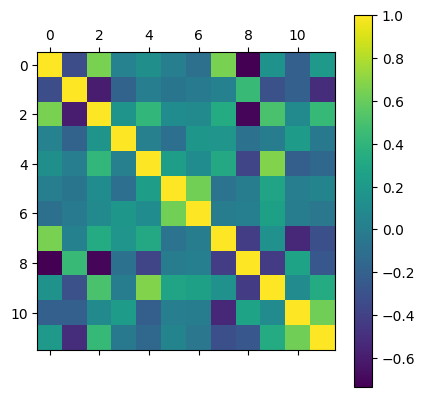

In [ ]:
def correlation_matrix(X):
    corr = None
    # YOUR CODE HERE
    
    data = X
    

# Compute the correlation matrix
    n = len(data)
    means = [sum(x) / n for x in data.T]
    stddevs = []
    for i in range(len(data[0])):
        std = [(x[i] - means[i])**2 for x in data]
        stddevs.append((sum(std) / n)**0.5)



    corr = [[0 for _ in range(len(data[0]))] for _ in range(len(data[0]))]


    for i in range(len(data[0])):
        for j in range(len(data[0])):
            if i == j:
                corr[i][j] = 1
            else:
                cov = sum((data[k][i] - means[i]) * (data[k][j] - means[j]) for k in range(n)) /n
                corr[i][j] = cov / (stddevs[i] * stddevs[j])
    

    # YOUR CODE HERE 
    return corr
    
X = data_np
Corr = correlation_matrix(X)
print(Corr)
plt.matshow(Corr)
plt.colorbar()

In [ ]:
np.corrcoef(X, rowvar=False)

array([[ 1.00000000e+00, -3.26016577e-01,  6.52130227e-01,
         3.49343866e-02,  1.27671225e-01,  7.21408144e-03,
        -9.33537029e-02,  6.51839356e-01, -7.34885085e-01,
         1.54096196e-01, -2.06248302e-01,  1.93590543e-01],
       [-3.26016577e-01,  1.00000000e+00, -5.96404835e-01,
        -1.82765955e-01,  6.69512100e-03, -5.76225657e-02,
        -1.25117078e-02,  3.08771325e-02,  4.36081240e-01,
        -3.03024475e-01, -2.00330376e-01, -5.04896279e-01],
       [ 6.52130227e-01, -5.96404835e-01,  1.00000000e+00,
         1.63504958e-01,  4.13145371e-01,  1.08933317e-01,
         9.81764484e-02,  3.32445767e-01, -7.02454346e-01,
         5.03345460e-01,  9.15106364e-02,  4.30625875e-01],
       [ 3.49343866e-02, -1.82765955e-01,  1.63504958e-01,
         1.00000000e+00,  1.96556313e-02, -1.01727052e-01,
         1.81642784e-01,  1.67761003e-01, -7.80012382e-02,
         1.08055046e-03,  2.24290378e-01, -3.05815382e-02],
       [ 1.27671225e-01,  6.69512100e-03,  4.1314537

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in point A), which pair of different attributes has the highest correlation? <br>

*******************
By observing the correlation matrix, we can see that the pair of attributes with the highest positive correlation is chlorides and sulphates. The correlation coefficient between these two attributes is 0,6746, which is the highest among all the pairs of attributes in the dataset.

The pair of attributes with the highest negative correlation is fixed acidity and pH. The correlation coefficient between these two attributes is -0.7349.
******************

In [ ]:
for i in range(len(Corr)):
    for j in range(len(Corr[i])):
        if Corr[i][j]==1:
            Corr[i][j]=0


print(np.where(Corr == np.amax(Corr)))
np.max(Corr)

print(Corr[5][6])
Corr[9][4]

(array([4, 9]), array([9, 4]))


0.6745559968200553

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two attributs are highly correlated? <br>

*******************
If two attributes are highly correlated, it means that changes in one variable are associated with changes in the other variable. In other words, when one attribute changes, there is a tendency for the other attribute to change as well. This indicates a relationship between the two attributes and they are probably influenced by similar underlying factors.

If the correlation coefficient between two variables is close to 1, it indicates a strong positive correlation, which means that an increase in one variable is associated with an increase in the other variable. On the other hand, if the correlation coefficient is close to -1, it indicates a strong negative correlation, which means that an increase in one variable is associated with a decrease in the other variable.

If the correlation coefficient is close to 0, it indicates that there is no linear relationship between the two variables.
******************

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the attributes of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
The correlation between chlorides and sulphates does make somehow make sense since they are both type of salts which probably came from a common source. Therefore when the concentration of one of these two attributes increases, the concentration of the other attribute is also likely to increase.

The negative correlation between fixed acidity and pH can also make sense because these two attributes are related to the acidity of the wine. Fixed acidity refers to the amount of acid in the wine, while pH is a measure of the acidity level of the wine. Higher fixed acidity indicates more acid in the wine, which would result in a lower pH. Therefore, it is reasonable to expect that these two attributes would be negatively correlated.

******************

### Task 2.1.2 (1 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below.
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [ ] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

In [ ]:
sns.heatmap(wq.corr(),annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Correlation')
plt.show()

*******************
The correlation matrix is obtained by normalizing the covariance matrix. This normalization involves dividing each element of the covariance matrix by the product of the standard deviations of the two variables corresponding to that element. The result is a matrix of correlation coefficients, where each coefficient is between -1 and 1, representing the linear relationship between the two variables.

Therefore, the correlation matrix provides a standardized way of measuring the linear relationship between variables, whereas the covariance matrix measures how much the two variables move in relation to each other. However, since the covariance value is not standardized, it can be difficult to interpret the strength of the relationship between two variables.

******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the wine dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

In [ ]:
# Data
X = data_np

# YOUR CODE HERE
# Standard score normalization

def standard_score(X):
    X_mean = []
    X_std = []
    for i in range(len(X[0])):
        column_i = [row[i] for row in X]
        mean_i = sum(column_i) / len(column_i)
        std_i = math.sqrt(sum([(x - mean_i)**2 for x in column_i]) / len(column_i))
        X_mean.append(mean_i)
        X_std.append(std_i)
        for j in range(len(X)):
            X[j][i] = (X[j][i] - mean_i) / std_i

    return X




# # Compute the correlation matrix
#     n = len(data)
#     means = [sum(x) / n for x in data.T]
#     stddevs = []
#     for i in range(len(data[0])):
#         std = [(x[i] - means[i])**2 for x in data]
#         stddevs.append((sum(std) / n)**0.5)



#     corr = [[0 for _ in range(len(data[0]))] for _ in range(len(data[0]))]


#     for i in range(len(data[0])):
#         for j in range(len(data[0])):
#             if i == j:
#                 corr[i][j] = 1
#             else:
#                 cov = sum((data[k][i] - means[i]) * (data[k][j] - means[j]) for k in range(n)) /n
#                 corr[i][j] = cov / (stddevs[i] * stddevs[j])
    

#     # YOUR CODE HERE 
#     return corr









# Range normalization
def range_normalization(X):
    X_min = []
    X_max = []
    for i in range(len(X[0])):
        column_i = [row[i] for row in X]
        min_i = min(column_i)
        max_i = max(column_i)
        X_min.append(min_i)
        X_max.append(max_i)
        for j in range(len(X)):
            X[j][i] = (X[j][i] - min_i) / (max_i - min_i)
    return X






# Covariance matrices
def covariance_matrix(X):
    n_features = len(X[0])
    covariance = [[0 for _ in range(n_features)] for _ in range(n_features)]
    for i in range(n_features):
        for j in range(i, n_features):
            mean_i = sum([row[i] for row in X]) / len(X)
            mean_j = sum([row[j] for row in X]) / len(X)
            covariance_ij = sum([(row[i] - mean_i) * (row[j] - mean_j) for row in X]) / (len(X) - 1)
            covariance[i][j] = covariance_ij
            covariance[j][i] = covariance_ij
    return covariance


covariance_unnormalized = covariance_matrix(X)
covariance_std = covariance_matrix(X_std)
covariance_minmax = covariance_matrix(X_minmax)



# Plotting covariance matrices
import matplotlib.pyplot as plt

plt.imshow(covariance_unnormalized, cmap='hot', interpolation='nearest')
plt.title('Unnormalized data')
plt.show()

plt.imshow(covariance_std, cmap='hot', interpolation='nearest')
plt.title('Standard score normalized features')
plt.show()

plt.imshow(covariance_minmax, cmap='hot', interpolation='nearest')
plt.title('Range (min-max) normalized features')
plt.show()


# YOUR CODE HERE

NameError: name 'math' is not defined

### Task 2.1.4 (3 points)
<span style='color: green'>**\[Describe\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other.
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>IMPORTANT: Do NOT just choose one answer. Please clarify WHY this is the correct answer.</font>

*******************
**YOUR ANSWER HERE**
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>IMPORTANT: You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [ ]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np
def norm_dist(x, b): 
    dist = 0
    ### YOUR CODE HERE

def norm_dist(b, x):
    # Compute sample mean and variance
    mu = np.mean(x)
    var = np.var(x)
    # Compute histogram of normal distribution and sample
    hist_norm, _ = np.histogram(norm.rvs(loc=mu, scale=np.sqrt(var), size=len(x)), bins=b)
    hist_x, _ = np.histogram(x, bins=b)
    # Compute absolute differences and sum them up
    return np.sum(np.abs(hist_x - hist_norm))
    
    ### YOUR CODE HERE
    return dist

### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
**YOUR ANSWER HERE**
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [ ]:
# YOUR CODE HERE



# YOUR CODE HERE

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

*******************
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the attribute features follow a normal distribution?

*******************
**YOUR ANSWER HERE**
******************

### Task 2.2.3 (1 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Describe\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

In [ ]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape

fig = plt.figure(constrained_layout=True, figsize=(8, 30))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(3,n): 
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
**YOUR ANSWER HERE**
******************

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and use the elbow method plotting the **silhouette coefficient** to detect the number of clusters $k$. 

Use the "sulphates" and "alcohol" features of the data set. Your final plot should look like the figure below:

![SNOWFALL](images/elbow.png)

In [ ]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.1.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>IMPORTANT: You can use the KMeans implementation from scikit-learn.</font> <br>

In [ ]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)


### YOUR CODE HERE


clusters = []

plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=clusters)

### Task 3.1.3 (6 points)
<span style='color: green'>**\[Implement\]**</span><br> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 


In [ ]:
### YOUR CODE HERE
X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.8): 
    k = 0 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return k


def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=.01): 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return clusters


clusters = kernel_kmeans(X_norm, NUMBER_OF_CLUSTERS)

scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)
clusters = kernel_kmeans(X_scaled, SOME_AMOUNT_OF_CLUSTERS)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)


## Task 3.2 Clustering quality

### Task 3.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> **Conditional Entropy (CE)** as a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$.

The **Conditional Entropy** of $C$ **given** $T$ is given by: 
$$\text{CE}(C|T)=-\sum\limits^{|C|}_{i=1}\sum\limits^{|T|}_{j=1}\frac{n_{ij}}{n_i}\log\frac{n_{ij}}{n_i}$$
where $n_{i}$ is the total number of points in cluster $C_i$ and $n_{ij}$ is the number of common points between clusters $C_i$ and $T_j$


**Hint**: First implement **Entropy** and then **Conditional Entropy**.

In [ ]:
def entropy(C):
    # Let C be a list of clusters
    entropy = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return entropy


def CE(C1, C2):
    ce = 0
    ### YOUR CODE HERE
    
    
    ### YOUR CODE HERE
    return ce

    

X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

### Task 3.2.2 (3 points)
<span style='color: green'>**\[Implement\]**</span>
Plot the Conditional Entropy (implementation from the Task 3.2.1) among the class labels $y$ and the clusters you found with k-means in Task 3.1.1. 
Make sure that the number of clusters and the number of class labels is the same.<br>

In [ ]:
###YOUR CODE HERE


###YOUR CODE HERE
class_labels = np.array(toy["quality"])
class_labels = [1 if x == 8 else 0 for x in class_labels]

<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Describe\]**</span><br>
B) What does the measure capture? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span><br>
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth cluster $j$ obtained from the labels $y$.

In [ ]:
### YOUR CODE HERE
T = np.array([]) # Ground-truth clusters
C = np.array([]) # Clusters obtained by k-means
### YOUR CODE HERE

## C is the clustering from k-means and T is the ground truth cluster assignments.
def purity(C, T):
    purity = 0
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return purity

print('Purity: {}, CE: {}'.format(purity(C,T), CE(C,T)))

### Task 3.2.4 (2 points)
A) <span style='color: green'>**\[Implement\]**</span><br>

Plot the purity of the clusters obtained by k-means in Task 3.1.1. 


In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare purity with **Conditional Entropy (CE)**. Which measure is preferable? (1) Check the correct box below and (2) motivate your answer.

- [ ] **CE** is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [ ] **CE** is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3 OPTICS

### Task 3.3.1 (7 point)
<span style='color: green'>**\[Implement\]**</span> the OPTICS algorithm

If you do not remember [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm), check the slides or the lecture notes. 

In [ ]:
def rdist(x,y,eps,min_samples):
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return rdis

def kernel_kmeans(X, eps, min_samples): 
    ### YOUR CODE HERE


    ### YOUR CODE HERE
    return clusters

### Task 3.3.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
A) Run OPTICS with parameters $\varepsilon=0.07, minPts=3$. <br> 

In [ ]:
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare the results of OPTICS with those of k-means. Which of the two methods two achieve a better **CE**? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3.3 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple subspace clustering algorithm.
1. Take all subsets of 2,3 attributes. Beware that you should only use the numerical attributes.
2. Run OPTICS on each subset. 
3. Compute **CE** for each subset. 
4. Keep the k subsets with the largest **CE**. 
    
<font color='red'>IMPORTANT: You may have to experiment a lot with eps and MinPts to get reasonable clusters. You are allowed to use **itertools** library to iterate over all subsets of size 2 and 3.</font>

In [ ]:
# Necessary Data normalization!
X_pt = toy.to_numpy()
X_norm_pt = (X_pt - X_pt.min(0)) / X_pt.ptp(0) 

### YOUR CODE HERE




### YOUR CODE HERE

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [ ]:
X_small = toy[["sulphates", "alcohol"]].to_numpy()

X_norm = (X_small - X_small.min(0)) / X_small.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

In [ ]:
def DBOutliers(X, eps, pi): 
    outliers = None
    ### YOUR STARTS CODE HERE
    
    
    ### YOUR CODE ENDS HERE
    return outliers

### Task 4.1.2 (2 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [ ]:
### YOUR CODE HERE

### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
**YOUR ANSWER HERE**
******************

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

A) Propose and <span style='color: green'>**\[Implement\]**</span> a heuristic method to tune parameters eps, pi. 

In [ ]:
def tune_dboutliers(X): 
    eps = 0
    pi = 0
    ### YOUR STARTS CODE HERE
    
    
    ### YOUR ENDS CODE HERE
    return eps, pi

B) <span style='color: green'>**\[Describe\]**</span> your algorithm, its main idea, its strengths and its weaknesses

*******************
**YOUR ANSWER HERE**
******************

## Task 4.2 LOF (2 points)
<span style='color: green'>**\[Describe\]**</span><br>
Using the parameters eps=0.18, pi=0.2 compare the results of DBOutliers with those obtained by LOF implemented in Week 9. What outliers do you find?

In [ ]:
### YOUR CODE HERE

*******************
**YOUR ANSWER HERE**
******************